<a href="https://colab.research.google.com/github/Temmy-bit/Temmy/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount

<function google.colab.drive.mount>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from tensorflow.keras.datasets import mnist
import cv2 as cv
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50V2, ResNet50

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm

In [ ]:
! pip install extra_keras_datasets

In [ ]:
from extra_keras_datasets import emnist
(X_train, y_train), (X_test, y_test) = emnist.load_data(type='byclass')

INFO:root:Loading dataset = emnist


743915520/743900280 [==============================] - 11s 0us/step


In [ ]:
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

In [ ]:
X_train.shape

(697932, 28, 28)

In [ ]:
X_test.shape

(116323, 28, 28)

In [ ]:
y_train

array([35, 36,  6, ...,  5, 11, 22], dtype=uint8)

In [ ]:
#Reshaping all images into 28*28 for pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [ ]:
data = np.vstack([X_train, X_test])
labels = np.hstack([y_train, y_test])


data = [cv.resize(image, (32, 32)) for image in data]
data = np.array(data, dtype="float32")

# add a channel dimension to every image in the dataset and scale the
# pixel intensities of the images from [0, 255] down to [0, 1]

data = np.expand_dims(data, axis=-1)
# data /= 255.0

In [ ]:
labels

array([35, 36,  6, ..., 28,  0,  5], dtype=uint8)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

counts = labels.sum(axis=0)

# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = {}

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
for i in range(0, len(classTotals)):
    classWeight[i] = classTotals.max() / classTotals[i]

In [ ]:
classTotals

array([40363, 44704, 40072, 41112, 39154, 36606, 39937, 41893, 39579,
       39533,  7469,  4526, 11833,  5341,  5785, 10622,  2964,  3673,
       13994,  4388,  2850,  5886, 10487,  9588, 29139,  9744,  3018,
        5882, 24272, 11396, 14604,  5433,  5501,  3203,  5541,  3165,
       11677,  6012,  3286, 11860, 28723,  2961,  4276, 10217,  3152,
        2213,  2957, 17853,  3109, 13316,  3215,  2816,  3499, 16425,
        3136, 21227,  3312,  3378,  3164,  3292,  2746,  3176])

In [ ]:
9*6

54

In [ ]:
classWeight

{0: 1.1075489928895275,
 1: 1.0,
 2: 1.1155919345178678,
 3: 1.087371083868457,
 4: 1.1417479695561117,
 5: 1.22122056493471,
 6: 1.1193629967198337,
 7: 1.0670995154321725,
 8: 1.129487859723591,
 9: 1.130802114688994,
 10: 5.985272459499264,
 11: 9.877154220061865,
 12: 3.7779092368799123,
 13: 8.36996817075454,
 14: 7.727571305099395,
 15: 4.208623611372623,
 16: 15.082321187584345,
 17: 12.170977402668118,
 18: 3.1945119336858654,
 19: 10.18778486782133,
 20: 15.685614035087719,
 21: 7.594971117906898,
 22: 4.262801563840946,
 23: 4.662494785148102,
 24: 1.5341638354095886,
 25: 4.587848932676519,
 26: 14.81245858184228,
 27: 7.60013600816049,
 28: 1.84179301252472,
 29: 3.922779922779923,
 30: 3.061079156395508,
 31: 8.22823486103442,
 32: 8.126522450463552,
 33: 13.956915391820168,
 34: 8.067857787402996,
 35: 14.124486571879936,
 36: 3.8283805772030486,
 37: 7.43579507651364,
 38: 13.60438222763238,
 39: 3.769308600337268,
 40: 1.5563833861365457,
 41: 15.097602161431949,
 42: 1

In [ ]:
classTotals.max() / classTotals[i]

14.075566750629722

In [ ]:
# from sklearn.preprocessing import 
trainX, testX, trainY, testY = train_test_split(data,labels, test_size=0.20, stratify=labels, random_state=42)

In [ ]:
trainX.shape

(651404, 32, 32, 1)

In [ ]:
testY.shape

(162851, 62)

In [ ]:
trainY.shape

(651404, 62)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.05,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
fill_mode="nearest")

In [ ]:
batch_size = 128
epochs = 10

In [26]:
enet = ResNet50(
        input_shape=(32, 32, 1),
        weights=None,
        include_top=False
    )

model = tf.keras.Sequential([
        enet,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(62, activation='softmax')
    ])
# model = keras.Sequential([
#                         keras.layers.Flatten(input_shape=(28,28)),
#                         keras.layers.Dense(128,activation='relu'),
#                         keras.layers.Dense(10,activation='softmax')
# ])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# model.fit(trainX,trainY,epochs =10)
model.summary()
H = model.fit(trainX,trainY,epochs=10)
test_loss,test_auc=model.evaluate(testX,testY)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23581440  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 62)                127038    
                                                                 
Total params: 23,708,478
Trainable params: 23,655,358
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/10
20357/20357 [==============================] - 811s 39ms/step - loss: 0.8070 - accuracy: 0.7652
Epoch 2/10
20357/20357 [==============================] - 783s 38ms/step - loss: 0.4394 - accuracy: 0.8434
Epoch 3/10
20357/20357 

In [27]:
test

NameError: ignored

In [28]:
test_loss,test_auc=model.evaluate(testX,testY)

5090/5090 [==============================] - 81s 16ms/step - loss: 6.3556 - accuracy: 0.8524


In [ ]:
# model.summary()

In [29]:
from keras.models import load_model

from keras.models import model_from_json

model_json = model.to_json()
with open("hand.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("hand.h5")
# Creates a HDF5 file 'model.h5'

In [31]:
model.predict(testX)

array([[6.0958934e-07, 6.9650108e-01, 8.7644894e-06, ..., 2.0292534e-06,
        2.6124766e-05, 2.4691973e-08],
       [1.0144653e-06, 7.7257374e-09, 6.8748378e-08, ..., 1.4638122e-09,
        6.1612255e-08, 2.5530019e-07],
       [3.3046421e-05, 6.5335502e-07, 2.9735168e-04, ..., 8.2338030e-09,
        2.9753335e-07, 1.3297836e-07],
       ...,
       [2.3347550e-07, 5.7314455e-09, 7.7958984e-10, ..., 4.5378762e-12,
        2.6337491e-13, 4.2058506e-11],
       [3.1136194e-06, 4.0716142e-07, 7.7361477e-08, ..., 1.4451833e-08,
        6.3686266e-06, 1.3238314e-09],
       [1.9921516e-05, 8.4903277e-04, 1.3055417e-04, ..., 7.6114162e-07,
        1.1038490e-05, 4.3059455e-07]], dtype=float32)

In [30]:
from sklearn.metrics import classification_report
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, 128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=characters))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      8073
           1       0.66      0.94      0.78      8941
           2       0.95      0.98      0.97      8014
           3       0.99      0.72      0.83      8223
           4       0.97      0.98      0.97      7831
           5       0.95      0.94      0.95      7321
           6       0.98      0.97      0.97      7987
           7       0.77      0.99      0.87      8379
           8       0.99      0.98      0.98      7916
           9       0.93      0.98      0.95      7907
           A       0.95      0.97      0.96      1494
           B       0.94      0.95      0.94       905
           C       0.76      0.94      0.84      2367
           D       0.86      0.90      0.88      1068
           E       0.96      0.98      0.97      1157
           F       0.78      0.98      0.87      2124
           G       0.94      0.85      0.89       59

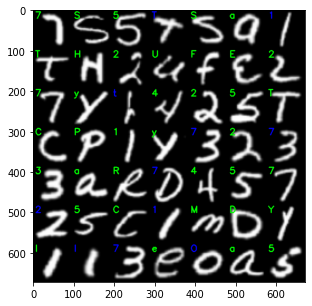

In [43]:
from imutils import build_montages
# initialize our list of output test images
images = []
# randomly select a few testing characters
for i in np.random.choice(np.arange(0, len(testY)), size=(49,)):
	# classify the character
	probs = model.predict(testX[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = characters[prediction[0]]
	# extract the image from the test data and initialize the text
	# label color as green (correct)
	image = (testX[i] * 255).astype("uint8")
	color = (0, 255, 0)
	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(testY[i]):
		color = (0, 0, 255)
	# merge the channels into one image, resize the image from 32x32
	# to 96x96 so we can better see it and then draw the predicted
	# label on the image
	image = cv.merge([image] * 3)
	image = cv.resize(image, (96, 96), interpolation=cv.INTER_LINEAR)
	cv.putText(image, label, (5, 20), cv.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
	# add the image to our list of output images
	images.append(image)
# construct the montage for the images
montage = build_montages(images, (96, 96), (7, 7))[0]
# show the output montage
plt.figure(figsize=(10,5))
# plt.savefig('image3.png')
plt.imshow( montage)
plt.show()

<function matplotlib.pyplot.show>

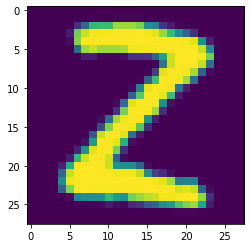

In [44]:
#Display a random image
plt.imshow(X_train[0])
plt.show

In [ ]:
# #Y'all can see how an image array looks like. all float values b/w 0 and 1
# m = X_train[2]
# print(m)

In [ ]:
# for t in range(697932):
#     X_train[t]=np.transpose(X_train[t])
    
# #checking
# plt.imshow(X_train[0])
# plt.show

# #for test data  
# for t in range(116323):
#     X_test[t]=np.transpose(X_test[t])

# #checking
# plt.imshow(X_test[1])
# plt.show

# print('Process Complete: Rotated and reversed test and train images!')

In [ ]:
# #Checking the last train image, just to be sure!
# m = X_train[697931]
# plt.imshow(m)
# plt.show

In [ ]:
# X_train = X_train.reshape(X_train.shape[0], 784,1)
# X_test = X_test.reshape(X_test.shape[0], 784,1)

In [ ]:

# def resh(ipar):
#     opar = []
#     for image in ipar:
#         opar.append(image.reshape(-1))
#     return np.asarray(opar)

# from keras.utils import np_utils

# train_images = X_train.astype('float32')
# test_images = X_test.astype('float32')

# train_images = resh(train_images)
# test_images = resh(test_images)


# train_labels = np_utils.to_categorical(y_train, 62)
# test_labels = np_utils.to_categorical(y_test, 62)

# # model = keras.Sequential([
# #                         keras.layers.Flatten(input_shape=(784,28,28,1)),
# #                         keras.layers.Dense(128,activation='relu'),
# #                         keras.layers.Dense(10,activation='softmax')
# # ])
# # model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# # model.fit(train_images,train_labels,epochs =10)
# K.set_learning_phase(1)

# model = Sequential()

# model.add(Reshape((28,28,1), input_shape=(784,)))

# #add the layer below for an accuracy of 89%.(Training time - over 20 hours)
# model.add(Convolution2D(32, (5,5), input_shape=(28,28,1),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
# model.add(Convolution2D(32, (5,5),activation='relu'))

# model.add(MaxPooling2D(pool_size=(2,2)))







# model.add(Flatten())




# #model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))



# model.add(Dropout(0.5))

# model.add(Dense(62, activation='softmax'))

# #opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# #opt = optimizers.Adadelta()
# opt = keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from skimage import io
# aug = ImageDataGenerator(
# rotation_range=10,
# zoom_range=0.05,
# width_shift_range=0.1,
# height_shift_range=0.1,
# shear_range=0.15,
# horizontal_flip=False,
# fill_mode="nearest")

In [ ]:
# print(model.summary())
# history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels),  epochs=2)

In [ ]:
# 1e-3

In [ ]:
# #evaluating model on test data. will take time
# scores = model.evaluate(test_images,test_labels, verbose = 0)
# # print("Accuracy: %.2f%%"%(scores[1]*100))

In [ ]:
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.grid()
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.grid()
# plt.show()

In [ ]:
# objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta')
# y_pos = np.arange(len(objects))
# performance = [86.2,85.39,89.53,84.29,87.11]
 
# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Accuracy')
# plt.title('Optimizers')
# plt.ylim(50,100)
# plt.show()

In [ ]:
# m = X_test[258].reshape(28,28)
# plt.imshow(m)
# plt.show
# print('prediction: '+str(model.predict(X_test[258].reshape(1,784))))

In [ ]:
# from keras.models import load_model

# from keras.models import model_from_json

# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# #saves the model info as json file
    
# model.save_weights("model.h5")
# # Creates a HDF5 file 'model.h5'

In [ ]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model


print('Model successfully loaded')

In [ ]:
labelNames = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

from imutils import build_montages
# initialize our list of output test images
images = []
# randomly select a few testing characters
for i in np.random.choice(np.arange(0, len(y_test)), size=(49,)):
	# classify the character
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = labelNames[prediction[0]]
	# extract the image from the test data and initialize the text
	# label color as green (correct)
	image = (X_test[i] * 255).astype("uint8")
	color = (0, 255, 0)
	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(y_test[i]):
		color = (0, 0, 255)
	# merge the channels into one image, resize the image from 32x32
	# to 96x96 so we can better see it and then draw the predicted
	# label on the image
	image = cv.merge([image] * 3)
	image = cv.resize(image, (96, 96), interpolation=cv.INTER_LINEAR)
	cv.putText(image, label, (5, 20), cv.FONT_HERSHEY_SIMPLEX, 0.75,
		color, 2)
	# add the image to our list of output images
	images.append(image)
# construct the montage for the images
montage = build_montages(images, (96, 96), (7, 7))[0]
# show the output montage
plt.imshow( montage)
plt.show()

In [ ]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('/content/drive/MyDrive/Read Books/Screenshot 2022-05-03 230342.png')
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs,hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
	# re-grab the image dimensions (now that its been resized)
# and then determine how much we need to pad the width and
# height such that our image will be 32x32
(tH, tW) = thresh.shape
dX = int(max(0, 32 - tW) / 2.0)
dY = int(max(0, 32 - tH) / 2.0)
# pad the image and force 32x32 dimensions
padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
  left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
  value=(0, 0, 0))
padded = cv2.resize(padded, (32, 32))
# prepare the padded image for classification via our
# handwriting OCR model


In [ ]:
# max_width = max(ctrs, key=lambda r: r[0] + r[2])[0]
# max_height = max(ctrs, key=lambda r: r[3])[3]
# nearest = max_height * 1.4

In [ ]:
# count = np.unique(ctrs, return_counts=True)[1]
# np.repeat(ctrs, count[np.argsort(ctrs)])

In [ ]:
# c = ctrs
# np.repeat(lambda r: (int(nearest * round(float(r[1])/nearest)) * max_width + r[0])), [c[v] for v in r]))

In [ ]:
# np.repeat(ctrs,np.bincount(ctrs)[ r: (int(nearest * round(float(r[1])/nearest)) * max_width + r[0])])

In [ ]:
may = (int(nearest * round(float(r[1])/nearest)) * max_width + r[0]))

In [ ]:
ctrs.sort(ctrs,key=lambda r: (int(nearest * round(float(r[1])/nearest)) * max_width + r[0]))

In [ ]:
m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()
dp = image.copy()
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
    
plt.imshow(dp)

In [ ]:
image = cv2.imread()
height, width, depth = image.shape

In [ ]:
plt.imshow(image),image.shape

In [ ]:
y_train.shape

In [ ]:
x = X_train[11280][0:]
x = x.reshape((28, 28))
plt.imshow(x, cmap='gist_yarg')
plt.show()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

In [ ]:
X_train.shape

In [ ]:
import imutils

In [ ]:
# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
image = cv2.imread('/content/drive/MyDrive/1581999808182.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted_ctrs(cnts, method="left-to-right")[0]
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape
		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=32)
		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=32)

In [ ]:
# re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 32 - tW) / 2.0)
		dY = int(max(0, 32 - tH) / 2.0)
		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (32, 32))
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))

In [ ]:
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
# OCR the characters using our handwriting recognition model
preds = model.predict(chars)
# define the list of label names
labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]

In [ ]:
# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
	i = np.argmax(pred)
	prob = pred[i]
	label = labelNames[i]
	# draw the prediction on the image
	print("[INFO] {} - {:.2f}%".format(label, prob * 100))
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(image, label, (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)
	# show the image
	cv2.imshow("Image", image)
	cv2.waitKey(0)